In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.regressionplots import influence_plot

In [125]:
df = pd.read_csv("D:\Assignment\Startups.csv")

In [126]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [336]:
df.isnull().sum()

RD        0
admin     0
mkt       0
State     0
Profit    0
dtype: int64

In [342]:
df[df.duplicated()].shape

(0, 5)

<AxesSubplot:>

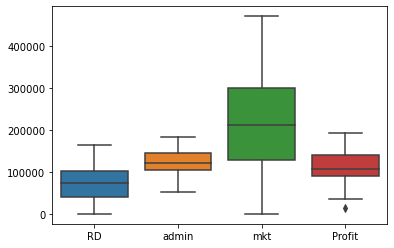

In [272]:
sns.boxplot(data= df) 

In [318]:
Q1 = 90138.90
Q3 = 139765.97
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [319]:
IQR, upper, lower

(49627.07000000001, 214206.575, 15698.294999999984)

In [323]:
outlier = df.Profit[(df.Profit <= lower)|(df.Profit >= upper)]

In [324]:
outlier

49    14681.4
Name: Profit, dtype: float64

In [128]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


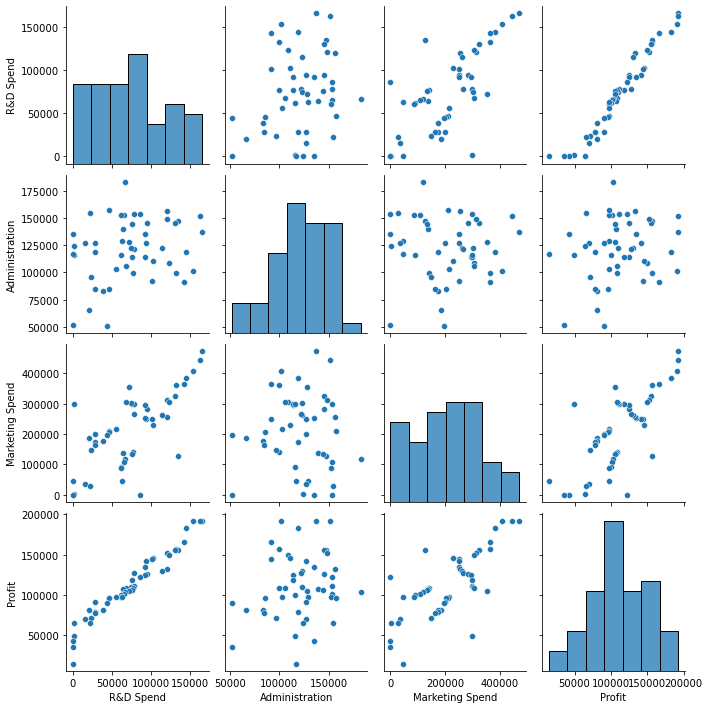

In [129]:
sns.pairplot(data=df)

In [130]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [131]:
df = df.rename({'R&D Spend': 'RD', 'Administration':'admin','Marketing Spend':'mkt'}, axis= 1)

In [132]:
model = smf.ols("Profit~RD+admin+mkt", data = df).fit()

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        21:02:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
model_chk = smf.ols("Profit~admin", data= df). fit()

In [135]:
model_chk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.162
Time:                        21:02:06   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
model_chk1 = smf.ols("Profit~RD", data= df). fit()

In [137]:
model_chk1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.50e-32
Time:                        21:02:06   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
model_chk2 = smf.ols("Profit~mkt", data= df). fit()

In [139]:
model_chk2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.38e-10
Time:                        21:02:06   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mkt            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
#Collinearity Problem Check


col_rd = smf.ols("RD~mkt+admin", data= df).fit().rsquared
vif_rd = 1/(1-col_rd)

col_mkt = smf.ols("mkt~RD+admin", data= df).fit().rsquared
vif_mkt = 1/(1-col_mkt)

col_admin = smf.ols("admin~RD+mkt", data= df).fit().rsquared
vif_admin = 1/(1-col_admin)

In [141]:
d1 = {'Variables': ['RD', 'mkt', 'admin'], 'VIF':[vif_rd, vif_mkt, vif_admin]}

In [142]:
vif_df = pd.DataFrame(d1)

In [143]:
vif_df #will consider all

,Variables,VIF
0,RD,2.468903
1,mkt,2.326773
2,admin,1.175091


In [144]:
model_1 = smf.ols("np.sqrt(Profit)~np.sqrt(mkt+RD+admin)", data= df).fit()

In [145]:
model_1.summary() # normal model itself is giving good R square so will disregard this

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.47e-15
Time:                        21:02:06   Log-Likelihood:                -246.75
No. Observations:                  50   AIC:                             497.5
Df Residuals:                      48   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    76.1145     22.924      3.320      0.002      30.022     122.207
np.sqrt(mkt + RD + admin)     0.4052      0.036     11.264      0.000       0.333       0.478
==============================================================================
Omnibus:                       22.760   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.180
Skew:                          -1.312   Prob(JB):                     2.55e-10
Kurtosis:                       6.784   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

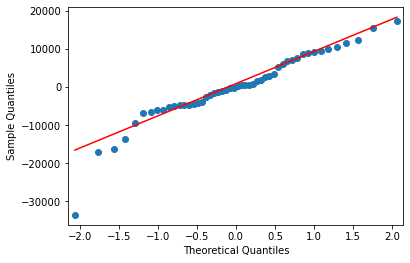

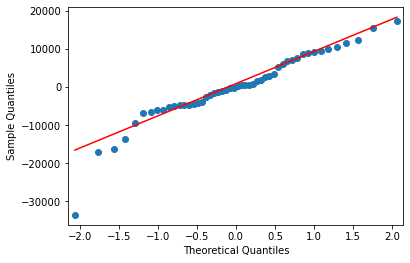

In [146]:
sm.qqplot(model.resid, line= 'q')

In [147]:
list = [np.where(model.resid<-30000)]

In [148]:
list 

[(array([49], dtype=int64),)]

eval_env: 1


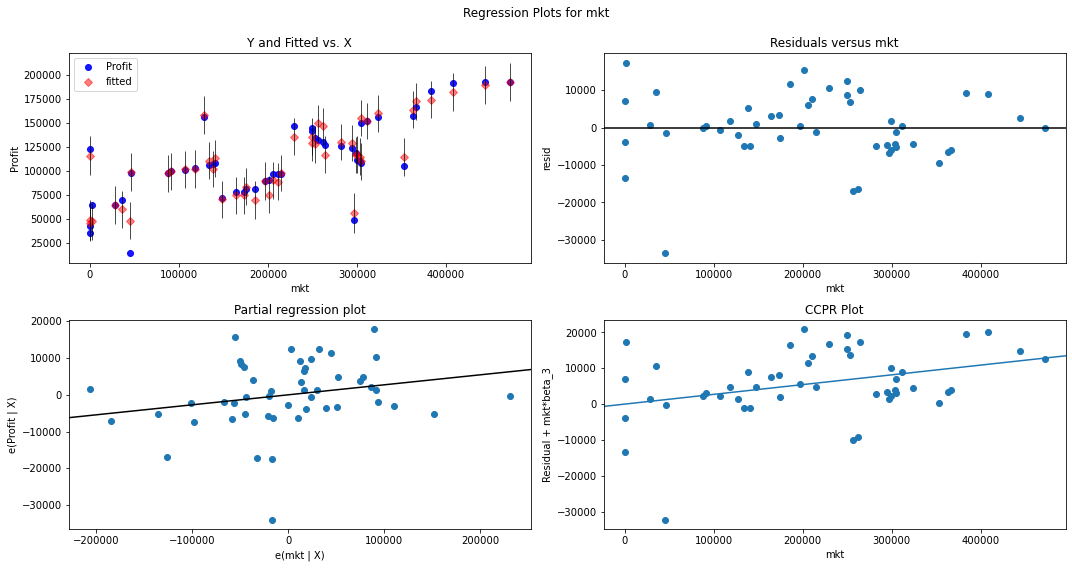

In [149]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'mkt', fig=fig)
plt.show()

eval_env: 1


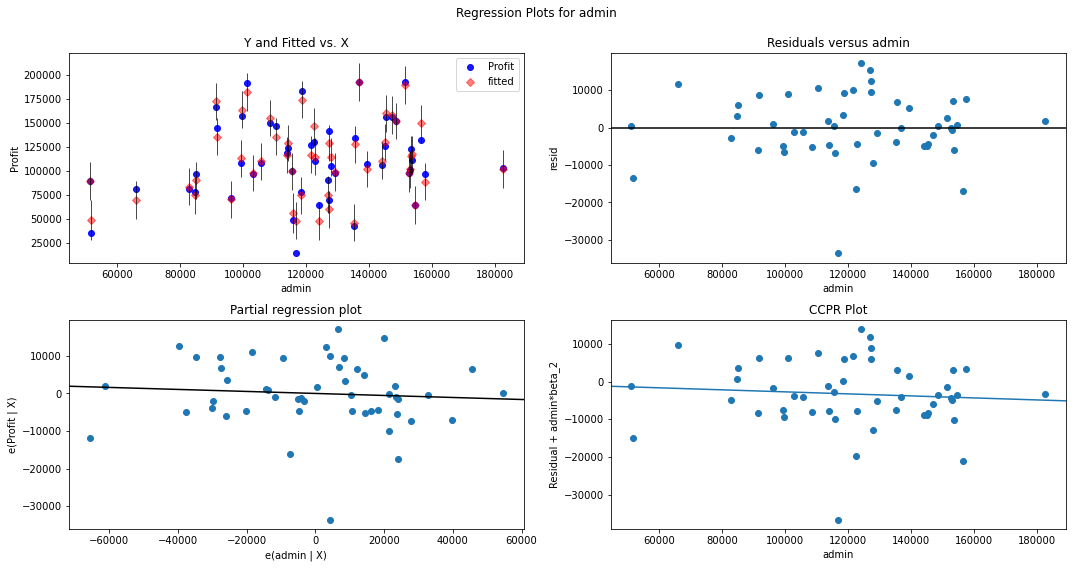

In [150]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin', fig=fig)
plt.show()

eval_env: 1


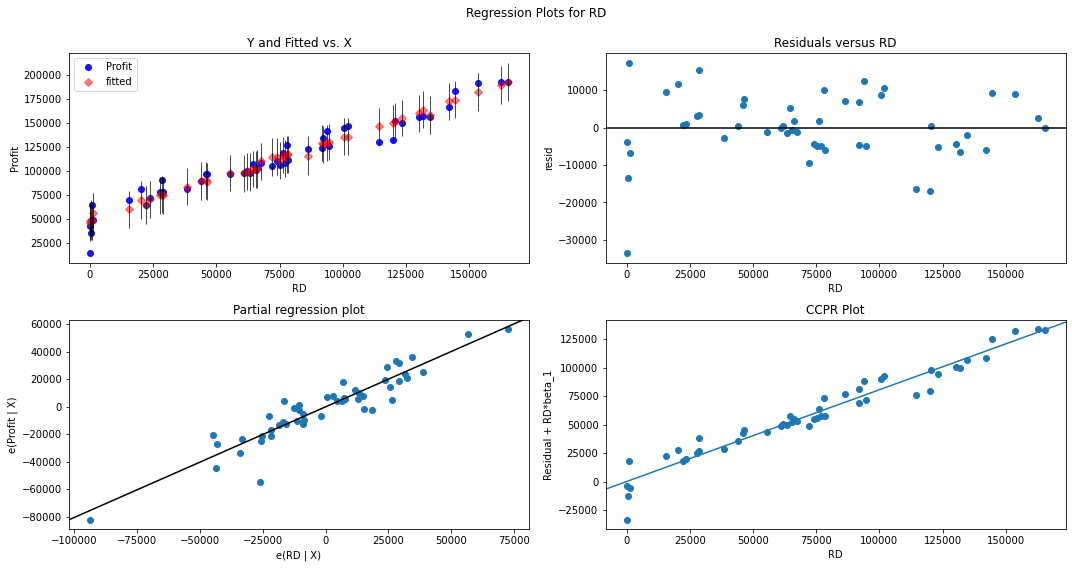

In [151]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD', fig=fig)
plt.show()

In [344]:
model_influ = model.get_influence()
(c,_) = model_influ.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

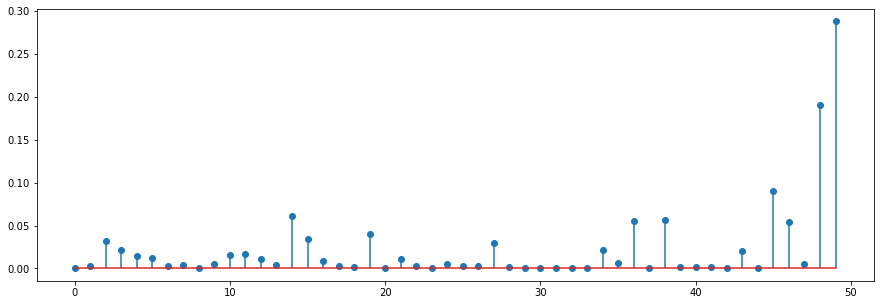

In [153]:
fig = plt.figure(figsize=(15,5))
plt.stem(np.arange(len(df)), np.round(c,5))
plt.show()

In [154]:
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

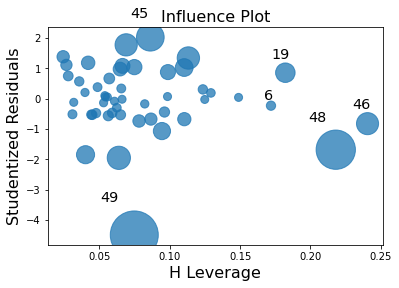

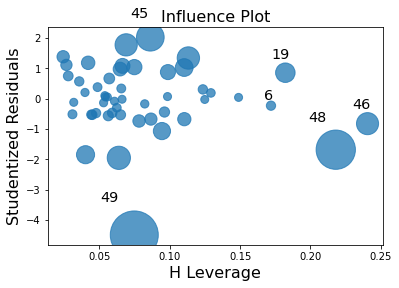

In [155]:
influence_plot(model)

In [156]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [325]:
df_new = df.drop(index= 49, axis= 0). reset_index(drop = True)

In [326]:
df_new

,RD,admin,mkt,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [327]:
fin_model = smf.ols("(Profit)~(RD+admin+mkt)", data= df_new). fit()

In [328]:
fin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           8.85e-32
Time:                        00:30:01   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
mkt            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
predicted_profit = fin_model.predict(df_new)

In [330]:
df_new['Predict_profit'] = predicted_profit

In [331]:
df_new

,RD,admin,mkt,State,Profit,Predict_profit
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778


In [332]:
df_check = pd.DataFrame()
df_check = df_new.loc[:,["Predict_profit", "Profit"]]

In [333]:
df_check

,Predict_profit,Profit
0,190716.676999,192261.83
1,187537.122227,191792.06
2,180575.526396,191050.39
3,172461.144642,182901.99
4,170863.486721,166187.94
5,162582.583177,156991.12
6,157741.338633,156122.51
7,159347.735318,155752.60
8,151328.826941,152211.77
9,154236.846778,149759.96


<AxesSubplot:xlabel='Predict_profit', ylabel='Profit'>

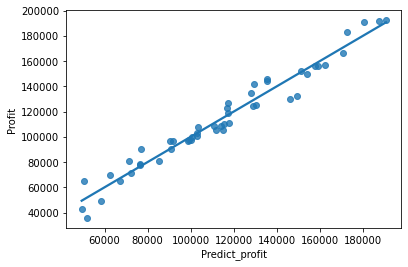

In [334]:
sns.regplot(x = df_check['Predict_profit'], y = df_check['Profit'], data= df_check, ci = None)